<a href="https://colab.research.google.com/github/Vrishin-Reddy/Mini_Proj/blob/master/Text_Detection_Using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np

import nltk
# if it is the first time using nltk uncomment line below and run it and download it
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sentiment_Analysis_Dataset.csv',error_bad_lines=False)
df.head()

<ipython-input-4-d71ef15940a6>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/Sentiment_Analysis_Dataset.csv',error_bad_lines=False)
<ipython-input-4-d71ef15940a6>:1: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Sentiment_Analysis_Dataset.csv',error_bad_lines=False)


,ItemID,Sentiment,SentimentSource,SentimentText,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,0,Sentiment140,is so sad for my APL frie...,NaN,NaN,NaN
1,2,0,Sentiment140,I missed the New Moon trail...,NaN,NaN,NaN
2,3,1,Sentiment140,omg its already 7:30 :O,NaN,NaN,NaN
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,NaN,NaN,NaN
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,NaN,NaN,NaN


In [ ]:
def text_cleaning(df):
    import pandas as pd
    import numpy as np
    import nltk
    #nltk.download()
    from nltk import word_tokenize
    from nltk.corpus import stopwords
    import string

    df['cleaned_text'] = ""
    df['tokenized'] = ""

    for index, row in df.iterrows():
        text = row['SentimentText'].lower()
        cleaned = [char for char in text if char not in string.punctuation]
        cleaned = "".join(cleaned)
        tokenized = word_tokenize(cleaned)
        df.at[index, 'cleaned_text'] = cleaned
        df.at[index, 'tokenized'] = tokenized

    return df

In [ ]:
# Select Columns to use
df_cleaned = df[['Sentiment', 'SentimentText']]
df_cleaned = df_cleaned[pd.notnull(df_cleaned['SentimentText'])]
df_cleaned.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [ ]:
# Print shape of dataset
print(df_cleaned.shape)

(1048575, 2)


In [ ]:
# Negative is represented by the number 0 and Positive by 1
print(df_cleaned.Sentiment.value_counts())

1    554470
0    494105
Name: Sentiment, dtype: int64


In [ ]:
def text_pred_cleaning(data, tfidf_vect, model):
    import pandas as pd
    import numpy as np
    import nltk
    #nltk.download()
    from nltk import word_tokenize
    from nltk.corpus import stopwords
    import string

    text = data.lower()
    cleaned = [char for char in text if char not in string.punctuation]
    cleaned = "".join(cleaned)
    result = np.array([cleaned])

    result_prediction = text_pred_features(result, tfidf_vect, model)


    return result_prediction

In [ ]:
df2 = text_cleaning(df_cleaned)
df2.head(3)


,Sentiment,SentimentText,cleaned_text,tokenized
0,0,is so sad for my APL frie...,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]"
1,0,I missed the New Moon trail...,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg its already 730 o,"[omg, its, already, 730, o]"


In [ ]:
# Reset index due to some skipping rows (error) while loading csv
df_cleaned = df_cleaned.reset_index(drop=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import pickle


def text_features(df, test_size):
    import pandas as pd
    import numpy as np

    X = df['cleaned_text']
    y = df['Sentiment']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    tfidf_vect = TfidfVectorizer(min_df=1, stop_words='english')

    tfidf_vect.fit(X_train)

    # Multinomial Naive Bayes
    mnb = MultinomialNB()
    mnb.fit(tfidf_vect.transform(X_train), y_train)

    # Support Vector Machine
    svm = LinearSVC()
    svm.fit(tfidf_vect.transform(X_train), y_train)

    # Linear Logistic Regression
    lr = LogisticRegression()
    lr.fit(tfidf_vect.transform(X_train), y_train)

    # Saving Models
    models = {'mnb': mnb,
              'svm': svm,
              'lr': lr}

    for name, model in models.items():
        filename = f"{name}_text_emotion_model.sav"
        pickle.dump(model, open(filename, 'wb'))

    # Saving Vectorizer
    with open('tfidf_vect.pk', 'wb') as fin:
        pickle.dump(tfidf_vect, fin)

    return models, tfidf_vect, X_train, X_test, y_train, y_test


In [ ]:
def text_pred_features(text, tfidf_vect, model):
    import pandas as pd
    import numpy as np
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC

    text_vect = tfidf_vect.transform([text]).toarray()

    emotion = model.predict(text_vect.reshape(1, -1))[0]

    emotions = {0:'Negative',
                1:'Positive'}

    result = emotions[emotion]

    return result

In [ ]:
model, tfidf_vect, X_train, X_test, y_train, y_test = text_features(df2, test_size=0.2)



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score, confusion_matrix,f1_score
models = {
    'MultinomialMB' : model['mnb'],
    'LinearSVC' : model['svm'],
    'LogisticRegression' : model['lr']
}
results_fullset = pd.DataFrame(columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])
for name, clf in models.items():
  y_pred = clf.predict(tfidf_vect.transform(X_test))
  acc = accuracy_score(y_test, y_pred)
  prec  = precision_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  results_fullset = results_fullset.append({
        'Model' : name,
        'Accuracy' : acc,
        'Recall' : rec,
        'Precision' : prec,
        'F1 Score' : f1

    }, ignore_index=True)

results_fullset



<ipython-input-26-17ee7bd27135>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_fullset = results_fullset.append({
<ipython-input-26-17ee7bd27135>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_fullset = results_fullset.append({
<ipython-input-26-17ee7bd27135>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_fullset = results_fullset.append({


,Model,Accuracy,Recall,Precision,F1 Score
0,MultinomialMB,0.756856,0.793697,0.757933,0.775403
1,LinearSVC,0.765701,0.793481,0.770349,0.781744
2,LogisticRegression,0.774632,0.814860,0.771723,0.792705


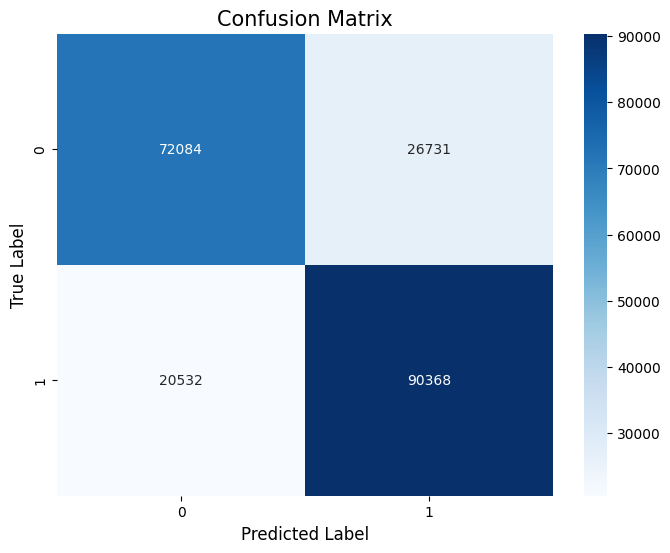

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_test_tfidf = tfidf_vect.transform(X_test)
y_pred = clf.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

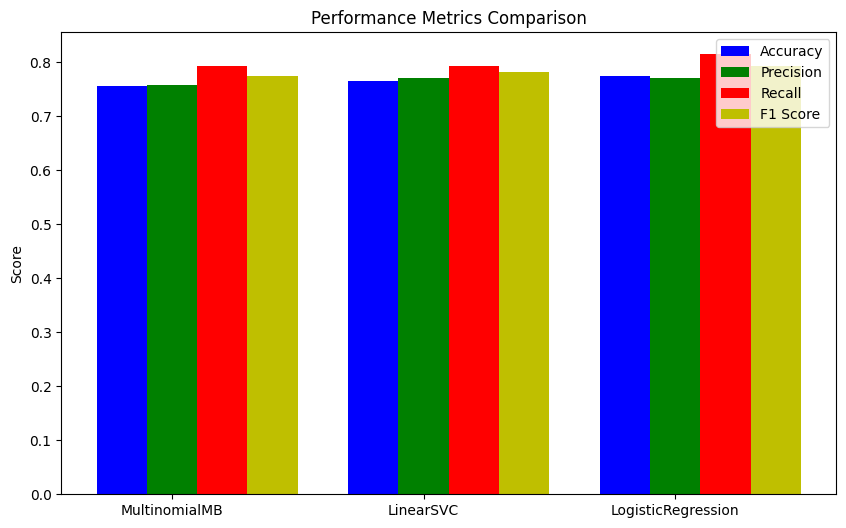

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_dict = {
    'MultinomialNB': model['mnb'],
    'LinearSVC': model['svm'],
    'LogisticRegression': model['lr']
}


# Define the data for the bar plot
models = results_fullset['Model']
accuracies = results_fullset['Accuracy']
precisions = results_fullset['Precision']
recalls = results_fullset['Recall']
f1_scores = results_fullset['F1 Score']

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracies, color='b', width=bar_width, label='Accuracy')
plt.bar(r2, precisions, color='g', width=bar_width, label='Precision')
plt.bar(r3, recalls, color='r', width=bar_width, label='Recall')
plt.bar(r4, f1_scores, color='y', width=bar_width, label='F1 Score')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.show()
